# Bird Classification

In [1]:
# Dataset link in Kaggle website

#https://www.kaggle.com/datasets/gpiosenka/100-bird-species

In [2]:
# imported required libraries 
import os

from skimage.io import imread

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import shuffle

import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
from keras.losses import SparseCategoricalCrossentropy
from keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten


import PIL
from PIL import Image

#### In order to being able to directly download the whole dataset in our Google Colab environment we need to install the kaggle library:

In [3]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### The next 5 cells would download and unzip the dataset from kaggle.com directly to our Google Colab environment (file section).

### Note: Before running the below cells, make sure to have the kaggle.jason file in Google Colab file section.

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download gpiosenka/100-bird-species

100% 1.69G/1.69G [00:16<00:00, 109MB/s]
100% 1.69G/1.69G [00:16<00:00, 110MB/s]


In [8]:
! unzip 100-bird-species.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/VIOLET TURACO/129.jpg  
  inflating: train/VIOLET TURACO/130.jpg  
  inflating: train/VIOLET TURACO/131.jpg  
  inflating: train/VIOLET TURACO/132.jpg  
  inflating: train/VIOLET TURACO/133.jpg  
  inflating: train/VIOLET TURACO/134.jpg  
  inflating: train/VIOLET TURACO/135.jpg  
  inflating: train/VIOLET TURACO/136.jpg  
  inflating: train/VIOLET TURACO/137.jpg  
  inflating: train/VIOLET TURACO/138.jpg  
  inflating: train/VIOLET TURACO/139.jpg  
  inflating: train/VIOLET TURACO/140.jpg  
  inflating: train/VIOLET TURACO/141.jpg  
  inflating: train/VIOLET TURACO/142.jpg  
  inflating: train/VIOLET TURACO/143.jpg  
  inflating: train/VIOLET TURACO/144.jpg  
  inflating: train/VIOLET TURACO/145.jpg  
  inflating: train/VIOLET TURACO/146.jpg  
  inflating: train/VIOLET TURACO/147.jpg  
  inflating: train/VIOLET TURACO/148.jpg  
  inflating: train/VIOLET TURACO/149.jpg  
  inflating: train/VIOLET TURACO/150.jpg  
  i

In [9]:
# Data file path (Google Colab)
processed_data_directory = '/content/'

In [10]:
birds_name = pd.read_csv(processed_data_directory + 'birds.csv')
birds_name

,class id,filepaths,labels,scientific label,data set
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,Malacocincla abbotti,train
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,Malacocincla abbotti,train
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,Malacocincla abbotti,train
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,Malacocincla abbotti,train
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,Malacocincla abbotti,train
...,...,...,...,...,...
75121,449,valid/YELLOW HEADED BLACKBIRD/1.jpg,YELLOW HEADED BLACKBIRD,Xanthocephalus,valid
75122,449,valid/YELLOW HEADED BLACKBIRD/2.jpg,YELLOW HEADED BLACKBIRD,Xanthocephalus,valid
75123,449,valid/YELLOW HEADED BLACKBIRD/3.jpg,YELLOW HEADED BLACKBIRD,Xanthocephalus,valid
75124,449,valid/YELLOW HEADED BLACKBIRD/4.jpg,YELLOW HEADED BLACKBIRD,Xanthocephalus,valid


In [11]:
# selecting 15 random birds out of 450 birds for the project

import random
    
birds_name_list = list(set(birds_name['labels']))

random.shuffle(birds_name_list)

birds_15_random = list(np.random.choice(np.array(birds_name_list), 15))

In [12]:
 birds_15_random

['RUFUOS MOTMOT',
 'PARAKETT  AKULET',
 'KOOKABURRA',
 'CREAM COLORED WOODPECKER',
 'APAPANE',
 'GRAY CATBIRD',
 'COPPERY TAILED COUCAL',
 'ASIAN CRESTED IBIS',
 'SCARLET TANAGER',
 'EVENING GROSBEAK',
 'CRAB PLOVER',
 'RED HEADED DUCK',
 'ROUGH LEG BUZZARD',
 'CRESTED AUKLET',
 'GOULDIAN FINCH']

In [15]:
# Functions to process our training and test data

def create_training_data():
    training_data = list()
    classes = birds_15_random
    for c in classes:
        image_folder = os.path.join(processed_data_directory+'train/', c)
        for i in range(1, len(os.listdir(image_folder))+1):
            if i < 10:
                try:
                    image_path = os.path.join(image_folder, f'00{str(i)}'+ '.jpg')
                    img = imread(image_path, as_gray=False)
                    img = img /255.0
                    class_value = classes.index(c)
                    training_data.append([img, class_value])
                except:
                    pass
            elif i < 100:
                try:
                    image_path = os.path.join(image_folder, f'0{str(i)}'+ '.jpg')
                    img = imread(image_path, as_gray=False)
                    img = img /255.0
                    class_value = classes.index(c)
                    training_data.append([img, class_value])
                except:
                    pass
            else:
                try:
                    image_path = os.path.join(image_folder, f'{str(i)}'+ '.jpg')
                    img = imread(image_path, as_gray=False)
                    img = img /255.0
                    class_value = classes.index(c)
                    training_data.append([img, class_value])
                except:
                    pass                            

    return training_data


def create_test_data():
    test_data = list()
    classes = birds_15_random
    for c in classes:
        image_folder = os.path.join(processed_data_directory+'test/', c)
        for i in range(1, len(os.listdir(image_folder))+1):
            image_path = os.path.join(image_folder, str(i)+ '.jpg')
            img = imread(image_path, as_gray=False)
            img = img /255.0
            class_value = classes.index(c)
            test_data.append([img, class_value])

    return test_data


def create_valid_data():
    valid_data = list()
    classes = birds_15_random
    for c in classes:
        image_folder = os.path.join(processed_data_directory+'valid/', c)
        for i in range(1, len(os.listdir(image_folder))+1):
            image_path = os.path.join(image_folder, str(i)+ '.jpg')
            img = imread(image_path, as_gray=False)
            img = img /255.0
            class_value = classes.index(c)
            valid_data.append([img, class_value])

    return valid_data

In [16]:
# Generating out training, testing & validation sets

training_data = create_training_data()
print("Training data shape: {}".format(np.shape(training_data)))
print("Training data length: {}".format(len(training_data)))


test_data = create_test_data()
print("Testing data shape: {}".format(np.shape(test_data)))
print("Testing data length: {}".format(len(test_data)))


valid_data = create_valid_data()
print("Validation data shape: {}".format(np.shape(valid_data)))
print("Validation data length: {}".format(len(valid_data)))

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


Training data shape: (2282, 2)
Training data length: 2282
Testing data shape: (75, 2)
Testing data length: 75
Validation data shape: (75, 2)
Validation data length: 75


In [17]:
training_data[1500][0].shape

(224, 224, 3)

In [18]:
# Shuffling our data around 

train_data = shuffle(training_data)
test_data = shuffle(test_data)
valid_data = shuffle(valid_data)

for item in train_data[:5]:
    print(item[1])

print()
    
for item in test_data[:5]:
    print(item[1])

print()
    
for item in valid_data[:5]:
    print(item[1])

12
11
1
14
13

10
6
7
1
8

1
13
13
2
0


In [19]:
# Splitting up our X and y for both training and testing sets

X_train = list()
y_train = list()
X_test = list()
y_test = list()
X_valid = list()
y_valid = list()


for attr, lbl in train_data:
    X_train.append(attr)
    y_train.append(lbl)
X_train = np.array(X_train)
y_train = np.array(y_train)


for attr, lbl in test_data:
    X_test.append(attr)
    y_test.append(lbl)
X_test = np.array(X_test)
y_test = np.array(y_test)


for attr, lbl in valid_data:
    X_valid.append(attr)
    y_valid.append(lbl)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f12db673b50>,
 <matplotlib.image.AxesImage at 0x7f12db5fb550>)

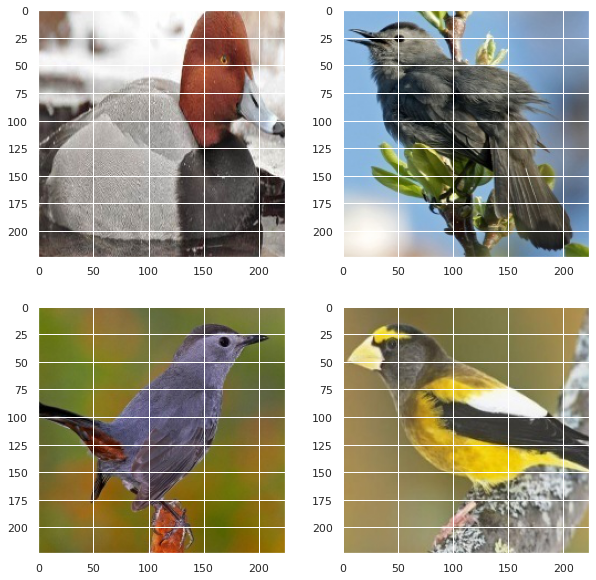

In [20]:
# Visualizing some of our images!

i = 23
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(X_train[i])
plt.subplot(222), plt.imshow(X_train[i+25])
plt.subplot(223), plt.imshow(X_train[i+50])
plt.subplot(224), plt.imshow(X_train[i+75])

In [21]:
# Verifying the shape of our data

print("Shape of X: {}".format(np.shape(X_train)))

Shape of X: (2282, 224, 224, 3)


In [22]:
# converting train images into tensor

X_train = tf.convert_to_tensor(X_train)

y_train = tf.convert_to_tensor(y_train)

X_train.shape, y_train.shape

(TensorShape([2282, 224, 224, 3]), TensorShape([2282]))

In [23]:
# converting test images into tensor

X_test = tf.convert_to_tensor(X_test)
y_test = tf.convert_to_tensor(y_test)

X_test.shape, y_test.shape

(TensorShape([75, 224, 224, 3]), TensorShape([75]))

In [24]:
# converting test images into tensor

X_valid = tf.convert_to_tensor(X_valid)
y_valid = tf.convert_to_tensor(y_valid)

X_valid.shape, y_valid.shape

(TensorShape([75, 224, 224, 3]), TensorShape([75]))

In [25]:
resize = keras.Sequential([layers.Resizing(150,150)])

In [26]:
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.1),
])

In [27]:
# Building our model!      TEST MODEL 6   (Highest Accuracy achieved %94)    2,290,000 params
epochs = 25
batch = 32

model = keras.Sequential([
    keras.Input(shape=(224,224,3)),
    # Adding preprocessing layers we created earlier
    # resize,
    data_augmentation,
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(100, activation = 'relu'),
    layers.Dense(15, activation="softmax"),
    ])

In [28]:
# Compiling our model

model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

In [29]:
# Summary - overview of our model

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)      

In [30]:
# Fitting our model on our data

model.fit(X_train, y_train, batch_size=batch, validation_split=.1, epochs=epochs)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


65/65 [==============================] - 23s 196ms/step - loss: 2.4863 - accuracy: 0.1461 - val_loss: 2.2495 - val_accuracy: 0.2358
Epoch 2/25
65/65 [==============================] - 12s 178ms/step - loss: 2.0772 - accuracy: 0.3005 - val_loss: 1.8920 - val_accuracy: 0.3493
Epoch 3/25
65/65 [==============================] - 12s 181ms/step - loss: 1.7091 - accuracy: 0.4218 - val_loss: 1.6799 - val_accuracy: 0.3930
Epoch 4/25
65/65 [==============================] - 12s 177ms/step - loss: 1.4977 - accuracy: 0.5105 - val_loss: 1.5105 - val_accuracy: 0.5197
Epoch 5/25
65/65 [==============================] - 12s 178ms/step - loss: 1.3606 - accuracy: 0.5455 - val_loss: 1.3175 - val_accuracy: 0.5546
Epoch 6/25
65/65 [==============================] - 12s 180ms/step - loss: 1.2135 - accuracy: 0.5796 - val_loss: 1.3504 - val_accuracy: 0.6114
Epoch 7/25
65/65 [==============================] - 12s 180ms/step - loss: 1.0559 - accuracy: 0.6434 - val_loss: 1.2139 - val_accuracy: 0.6157
Epoch 8/25

In [31]:
# Evaluating our model

score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.3606856167316437
Test accuracy: 0.9066666960716248


In [32]:
# Obtaining preditions

predictions = model.predict(X_test)
preds = [np.argmax(p) for p in predictions] # Grab the class with highest probability 

3/3 [==============================] - 0s 59ms/step


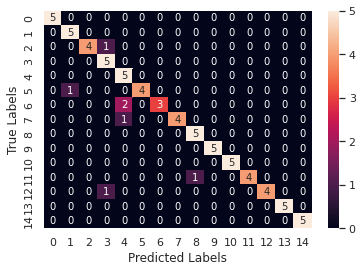

In [33]:
# Visualize our model's true labels vs preds

sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');

In [34]:
# Classification report -> evaluation metrics for our model 

print(classification_report(y_test,preds,digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000         5
           1      0.833     1.000     0.909         5
           2      1.000     0.800     0.889         5
           3      0.714     1.000     0.833         5
           4      0.625     1.000     0.769         5
           5      1.000     0.800     0.889         5
           6      1.000     0.600     0.750         5
           7      1.000     0.800     0.889         5
           8      0.833     1.000     0.909         5
           9      1.000     1.000     1.000         5
          10      1.000     1.000     1.000         5
          11      1.000     0.800     0.889         5
          12      1.000     0.800     0.889         5
          13      1.000     1.000     1.000         5
          14      1.000     1.000     1.000         5

    accuracy                          0.907        75
   macro avg      0.934     0.907     0.908        75
weighted avg      0.934   

In [35]:
model.save('/content/my_model')